<a href="https://colab.research.google.com/github/rts1988/Duolingo_spaced_repetition/blob/main/Duolingo_splittingdata_unseen_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is for splitting data into train and test for the unseen words in known languages question.

We will try to answer the following questions in order.

1. Can we train a model to predict whether a student would have forgotten a certain word when they encounter is after some time? 
2. Based on their performance on one word for a known student, can we improve our prediction on other words? 
3. Can we extract word-based features that can predict the ease and difficulty of remembering them?
4. Can we extract student and session based features that can predict if a word is forgotten?
4. Can we predict how easy or difficult a word is to remember for a new language based on our learnings?

Splitting the dataset:

1. first split - keep two languages aside for cold-start testing - done
2. second split - keep some unseen students aside for testing on seen words. include some low and high trace lengths (10%) - in this notebook. should include all the remaining languages. - done
3. third split - keep some unseen words aside for testing on seen students. include some frequent and infrequent words. (20%) - in this notebook. 
4. the rest. - student word pairings left.   

In [4]:
import bz2
import pickle
import _pickle as cPickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

def decompress_pickle(file):
 data = bz2.BZ2File(file, 'rb')
 data = cPickle.load(data)
 return data

def compressed_pickle(title, data):  # do not add extension in filename
 with bz2.BZ2File(title + '.pbz2', 'w') as f: 
  cPickle.dump(data, f)

path_name = '/content/drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We will start with what is leftover from separating out the cold start test sets and unseen test sets.

In [6]:
datadf3 = decompress_pickle(path_name+"Unseen_students_training_set.pbz2")

In [7]:
datadf3.shape

(9919875, 14)

We will prepare the next split of unseen words in known langugaes in the following steps:

1. get number of records per word, number of students per word, language pair. 
2. For each language pair, get a 20% split. 

In [8]:
num_lexemes = datadf3.groupby(['ui_language','learning_language'])['lexeme_string'].unique().apply(len)

In [10]:
num_lexemes

ui_language  learning_language
en           es                   3299
             fr                   4133
             it                   2173
             pt                   2771
es           en                   2878
pt           en                   2810
Name: lexeme_string, dtype: int64

In [14]:
def uniquelen(ser):
  return len(ser.unique())

In [15]:
en_to_es = datadf3.loc[(datadf3['ui_language']=='en') & (datadf3['learning_language']=='es'),:].groupby(['lexeme_string']).agg(Num_students=pd.NamedAgg('user_id',uniquelen), Num_records = pd.NamedAgg('user_id','count'))
en_to_es.head()

,Num_students,Num_records
lexeme_string,,
<*sf>/abogado<n><m><*numb>,571,882
<*sf>/acción<n><f><*numb>,24,29
<*sf>/actitud<n><f><*numb>,13,14
<*sf>/actividad<n><f><*numb>,28,45
<*sf>/acto<n><m><*numb>,24,25


In [16]:
en_to_es['Avg_rec_per_stud'] = en_to_es['Num_records']/en_to_es['Num_students']

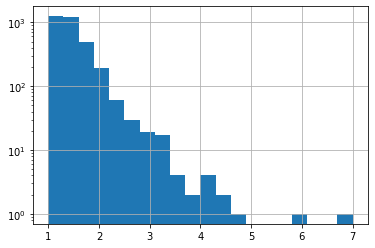

In [19]:
en_to_es['Avg_rec_per_stud'].hist(log=True,bins=20)

In [29]:
from sklearn.model_selection import train_test_split

en_to_es_remaining,en_to_es_unseen_words,y_remaining,y_unseen_words = train_test_split(en_to_es[['Num_students','Num_records']],en_to_es['Avg_rec_per_stud'],test_size=0.25)

In [30]:
en_to_es_unseen_words['Avg_rec_per_stud'] = y_unseen_words


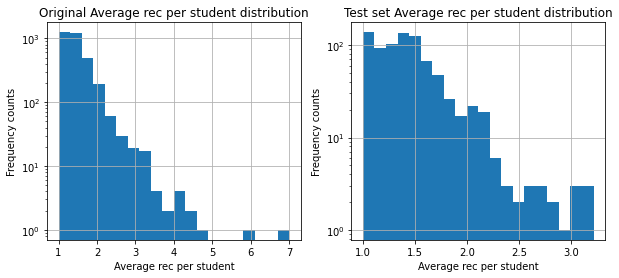

In [31]:
plt.subplots(1,2,figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
en_to_es['Avg_rec_per_stud'].hist(log=True,bins=20)
plt.subplot(1,2,2)
plt.title("Test set Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
en_to_es_unseen_words['Avg_rec_per_stud'].hist(log=True,bins=20)

English to Spanish

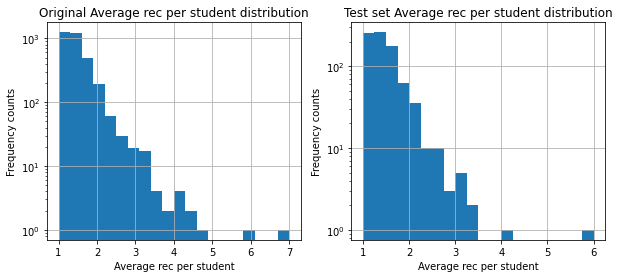

In [33]:
en_to_es = datadf3.loc[(datadf3['ui_language']=='en') & (datadf3['learning_language']=='es'),:].groupby(['lexeme_string']).agg(Num_students=pd.NamedAgg('user_id',uniquelen), Num_records = pd.NamedAgg('user_id','count'))
en_to_es['Avg_rec_per_stud'] = en_to_es['Num_records']/en_to_es['Num_students']
en_to_es_remaining,en_to_es_unseen_words,y_remaining,y_unseen_words = train_test_split(en_to_es[['Num_students','Num_records']],en_to_es['Avg_rec_per_stud'],test_size=0.25)
en_to_es_unseen_words['Avg_rec_per_stud'] = y_unseen_words
plt.subplots(1,2,figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
en_to_es['Avg_rec_per_stud'].hist(log=True,bins=20)
plt.subplot(1,2,2)
plt.title("Test set Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
en_to_es_unseen_words['Avg_rec_per_stud'].hist(log=True,bins=20)

English to French

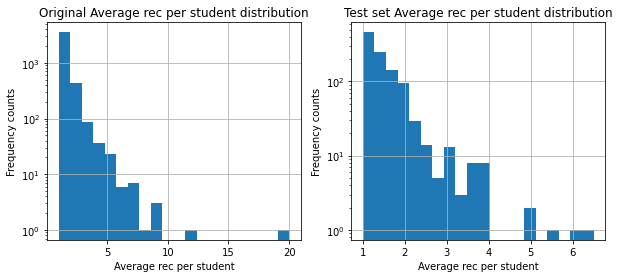

In [36]:
en_to_fr = datadf3.loc[(datadf3['ui_language']=='en') & (datadf3['learning_language']=='fr'),:].groupby(['lexeme_string']).agg(Num_students=pd.NamedAgg('user_id',uniquelen), Num_records = pd.NamedAgg('user_id','count'))
en_to_fr['Avg_rec_per_stud'] = en_to_fr['Num_records']/en_to_fr['Num_students']
en_to_fr_remaining,en_to_fr_unseen_words,y_remaining,y_unseen_words = train_test_split(en_to_fr[['Num_students','Num_records']],en_to_fr['Avg_rec_per_stud'],test_size=0.25)
en_to_fr_unseen_words['Avg_rec_per_stud'] = y_unseen_words
plt.subplots(1,2,figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
en_to_fr['Avg_rec_per_stud'].hist(log=True,bins=20)
plt.subplot(1,2,2)
plt.title("Test set Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
en_to_fr_unseen_words['Avg_rec_per_stud'].hist(log=True,bins=20)

English to Italian

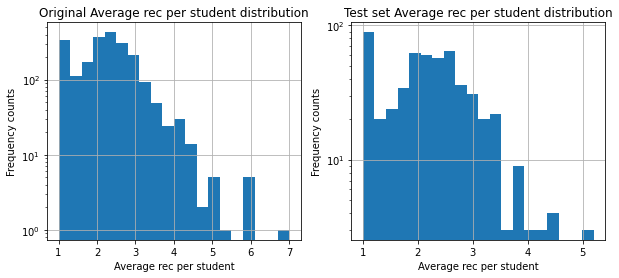

In [37]:
en_to_it = datadf3.loc[(datadf3['ui_language']=='en') & (datadf3['learning_language']=='it'),:].groupby(['lexeme_string']).agg(Num_students=pd.NamedAgg('user_id',uniquelen), Num_records = pd.NamedAgg('user_id','count'))
en_to_it['Avg_rec_per_stud'] = en_to_it['Num_records']/en_to_it['Num_students']
en_to_it_remaining,en_to_it_unseen_words,y_remaining,y_unseen_words = train_test_split(en_to_it[['Num_students','Num_records']],en_to_it['Avg_rec_per_stud'],test_size=0.25)
en_to_it_unseen_words['Avg_rec_per_stud'] = y_unseen_words
plt.subplots(1,2,figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
en_to_it['Avg_rec_per_stud'].hist(log=True,bins=20)
plt.subplot(1,2,2)
plt.title("Test set Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
en_to_it_unseen_words['Avg_rec_per_stud'].hist(log=True,bins=20)

English to Portuguese

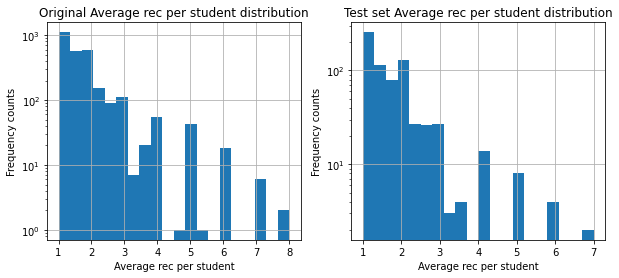

In [38]:
en_to_pt = datadf3.loc[(datadf3['ui_language']=='en') & (datadf3['learning_language']=='pt'),:].groupby(['lexeme_string']).agg(Num_students=pd.NamedAgg('user_id',uniquelen), Num_records = pd.NamedAgg('user_id','count'))
en_to_pt['Avg_rec_per_stud'] = en_to_pt['Num_records']/en_to_pt['Num_students']
en_to_pt_remaining,en_to_pt_unseen_words,y_remaining,y_unseen_words = train_test_split(en_to_pt[['Num_students','Num_records']],en_to_pt['Avg_rec_per_stud'],test_size=0.25)
en_to_pt_unseen_words['Avg_rec_per_stud'] = y_unseen_words
plt.subplots(1,2,figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
en_to_pt['Avg_rec_per_stud'].hist(log=True,bins=20)
plt.subplot(1,2,2)
plt.title("Test set Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
en_to_pt_unseen_words['Avg_rec_per_stud'].hist(log=True,bins=20)

Portuguese to English

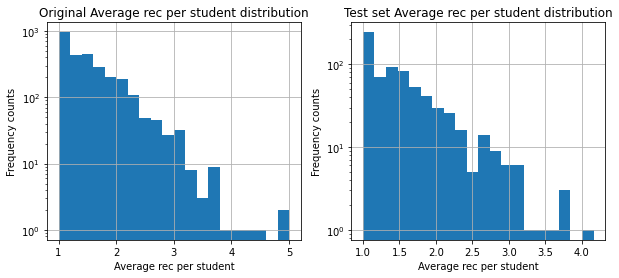

In [39]:
pt_to_en = datadf3.loc[(datadf3['ui_language']=='pt') & (datadf3['learning_language']=='en'),:].groupby(['lexeme_string']).agg(Num_students=pd.NamedAgg('user_id',uniquelen), Num_records = pd.NamedAgg('user_id','count'))
pt_to_en['Avg_rec_per_stud'] = pt_to_en['Num_records']/pt_to_en['Num_students']
pt_to_en_remaining,pt_to_en_unseen_words,y_remaining,y_unseen_words = train_test_split(pt_to_en[['Num_students','Num_records']],pt_to_en['Avg_rec_per_stud'],test_size=0.25)
pt_to_en_unseen_words['Avg_rec_per_stud'] = y_unseen_words
plt.subplots(1,2,figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
pt_to_en['Avg_rec_per_stud'].hist(log=True,bins=20)
plt.subplot(1,2,2)
plt.title("Test set Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
pt_to_en_unseen_words['Avg_rec_per_stud'].hist(log=True,bins=20)

Spanish to English

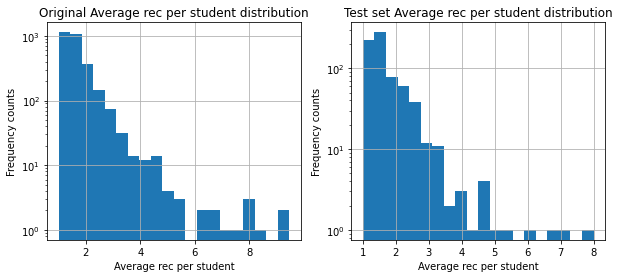

In [40]:
es_to_en = datadf3.loc[(datadf3['ui_language']=='es') & (datadf3['learning_language']=='en'),:].groupby(['lexeme_string']).agg(Num_students=pd.NamedAgg('user_id',uniquelen), Num_records = pd.NamedAgg('user_id','count'))
es_to_en['Avg_rec_per_stud'] = es_to_en['Num_records']/es_to_en['Num_students']
es_to_en_remaining,es_to_en_unseen_words,y_remaining,y_unseen_words = train_test_split(es_to_en[['Num_students','Num_records']],es_to_en['Avg_rec_per_stud'],test_size=0.25)
es_to_en_unseen_words['Avg_rec_per_stud'] = y_unseen_words
plt.subplots(1,2,figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
es_to_en['Avg_rec_per_stud'].hist(log=True,bins=20)
plt.subplot(1,2,2)
plt.title("Test set Average rec per student distribution")
plt.xlabel("Average rec per student")
plt.ylabel("Frequency counts")
es_to_en_unseen_words['Avg_rec_per_stud'].hist(log=True,bins=20)

In [46]:
unseen_words = list(en_to_es_unseen_words.index) + list(en_to_pt_unseen_words.index)\
+list(es_to_en_unseen_words.index) + list(en_to_fr_unseen_words.index)\
+list(en_to_it_unseen_words.index) + list(pt_to_en_unseen_words.index)

In [48]:
unseen_words_set = datadf3.loc[datadf3['lexeme_string'].isin(unseen_words),:]

In [49]:
unseen_words_set.shape

(3695667, 14)

In [51]:
unseen_words_set.shape[0]/datadf3.shape[0]*100

37.255177106566364

This is a bit higher than we want. Let's look at just 80% of the list unseen_words

In [61]:
import random
unseen_words = set(unseen_words)
len_uw = int(0.7*len(unseen_words))
unseen_words_set = datadf3.loc[datadf3['lexeme_string'].isin(random.sample(unseen_words,len_uw)),:]

In [62]:
unseen_words_set.shape[0]/datadf3.shape[0]*100

26.275744402021196

In [64]:
datadf4 = datadf3.drop(unseen_words_set.index)

In [67]:
compressed_pickle(path_name+"Unseen_words_test_set",unseen_words_set)

In [68]:
compressed_pickle(path_name+"Unseen_words_training_set",datadf4)

We have 26% of the dataset set apart for unseen words. We have saved it as a compressed pickle file.